# In-Class Quiz Nº 2

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Ruben Santos
## Number: 49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve

import pickle

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function
### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.
### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the raw data (make sure not to perform any scaling or transformation of the  data). Also include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.
### d) Print the total number of errors and the confusion matrix for the test dataset.

## 1.a)

In [2]:
#build the MLP
mlp=keras.Sequential()

mlp.add(keras.layers.Dense(50,activation='relu',input_shape=(28**2,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))

#compile the network
mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

print(mlp.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44,860
Trainable params: 44,860
Non-trainable params: 0
_________________________________________________________________
None


## 1.b)

In [3]:

print(X1.shape,X2.shape,y1.shape,y2.shape)

X1=X1.reshape((10000,28**2))*1.
X2=X2.reshape((5000,28**2))*1.

Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print(X1.shape,X2.shape,Y1.shape,Y2.shape)

train=mlp.fit(X1,Y1,epochs=100,batch_size=5000,validation_data=(X2,Y2))


(10000, 28, 28) (5000, 28, 28) (10000,) (5000,)
(10000, 784) (5000, 784) (10000, 10) (5000, 10)
Epoch 1/100
2/2 [==============================] - 4s 519ms/step - loss: 80.4915 - accuracy: 0.0789 - val_loss: 53.1125 - val_accuracy: 0.0980
Epoch 2/100
2/2 [==============================] - 0s 104ms/step - loss: 49.1700 - accuracy: 0.1083 - val_loss: 38.8666 - val_accuracy: 0.1248
Epoch 3/100
2/2 [==============================] - 0s 146ms/step - loss: 34.5961 - accuracy: 0.1549 - val_loss: 29.9670 - val_accuracy: 0.1470
Epoch 4/100
2/2 [==============================] - 0s 67ms/step - loss: 25.5442 - accuracy: 0.2008 - val_loss: 23.9018 - val_accuracy: 0.1808
Epoch 5/100
2/2 [==============================] - 0s 81ms/step - loss: 19.5222 - accuracy: 0.2489 - val_loss: 19.6860 - val_accuracy: 0.2060
Epoch 6/100
2/2 [==============================] - 0s 86ms/step - loss: 15.4347 - accuracy: 0.3019 - val_loss: 16.6524 - val_accuracy: 0.2402
Epoch 7/100
2/2 [==============================] 

## 1.c)

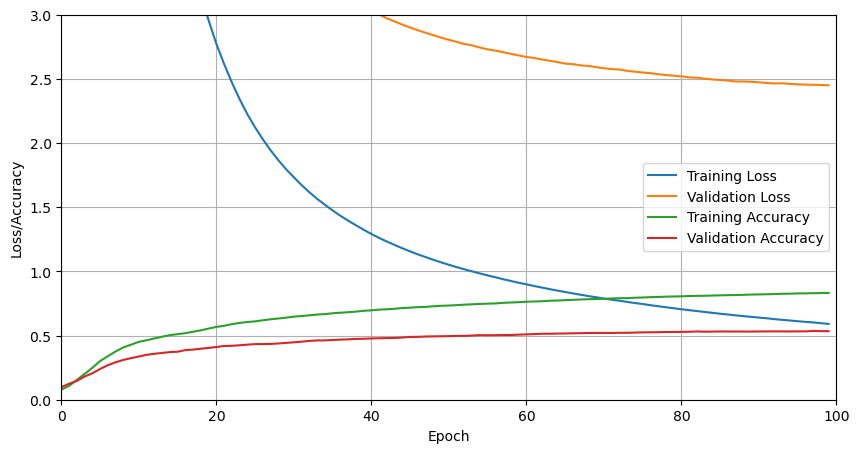

In [4]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.axis([0,100,0,3])
plt.show()

- Comentario: Podemos ver que tanto o erro de treino e de validacao diminuiem aao longo das epocas, o que significa que o modelo esta a aprender e que foram poucas epocas.

## 1.d)

In [5]:
Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

157/157 [==============================] - 0s 2ms/step
[[288   9  13   6  39  28   4  29  73  11]
 [  5 273  27   8  32  10  65  19  42  19]
 [ 11  26 213  26  32  14  41  35  52  50]
 [  8  27  26 273  21  22  24  18  52  29]
 [ 26  22  24  17 275  18  41  14  30  33]
 [ 10  27  38  19  17 306  39   8  26  10]
 [  4  23  50  18  37  15 277  17  34  25]
 [ 13  23  28  14  55   7  37 216  88  19]
 [ 23  35  30  13  25  12  38   9 301  14]
 [ 21  23  62  16  49   8  24  26  23 248]]
Score: 53.400000000000006
Number of erros: 2330


<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network with the same architecture of the MLP from the previous question. The only difference being the input layer.
### a) Pre-process the data using the function  $\texttt{PCA(whiten=True)}$. Train this function with the training data and apply the transformation to the training and test sets. Preseve only the first 250 principal componentes of the data. Use the pre-processed data in the following items.
### b)  Build this network, and compile it with the loss and the optimizer used in the previous question.  Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set and include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results. Also print the total number of errors and the confusion matrix for the test dataset.

## 2.a)

In [6]:
from sklearn.decomposition import PCA

D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

print("Original:", X1.shape,X2.shape,y1.shape,y2.shape)

X1=X1.reshape((10000,28**2))*1.
X2=X2.reshape((5000,28**2))*1.

Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print("P", X1.shape,X2.shape,Y1.shape,Y2.shape)

nComponets = 250
pca=PCA(n_components=nComponets, whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)

print("PCA:", X1p.shape,X2p.shape)

Original: (10000, 28, 28) (5000, 28, 28) (10000,) (5000,)
P (10000, 784) (5000, 784) (10000, 10) (5000, 10)
PCA: (10000, 250) (5000, 250)


## 2.b)

In [7]:
mlp=keras.Sequential()
mlp.add(keras.layers.Flatten(input_shape=(nComponets,)))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(50,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))


mlp.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

train=mlp.fit(X1p, Y1, epochs = 100, batch_size = 5000, validation_data = (X2p,Y2))

print(mlp.summary())


Epoch 1/100
2/2 [==============================] - 2s 258ms/step - loss: 2.4079 - accuracy: 0.1011 - val_loss: 2.4034 - val_accuracy: 0.1040
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 2.3729 - accuracy: 0.1076 - val_loss: 2.3792 - val_accuracy: 0.1096
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 2.3442 - accuracy: 0.1138 - val_loss: 2.3580 - val_accuracy: 0.1146
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 2.3176 - accuracy: 0.1240 - val_loss: 2.3393 - val_accuracy: 0.1192
Epoch 5/100
2/2 [==============================] - 0s 93ms/step - loss: 2.2930 - accuracy: 0.1344 - val_loss: 2.3226 - val_accuracy: 0.1232
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 2.2699 - accuracy: 0.1497 - val_loss: 2.3077 - val_accuracy: 0.1292
Epoch 7/100
2/2 [==============================] - 0s 46ms/step - loss: 2.2477 - accuracy: 0.1646 - val_loss: 2.2939 - val_accuracy: 0.1374
Epoch 8/100
2/2 [==

## 2.c)

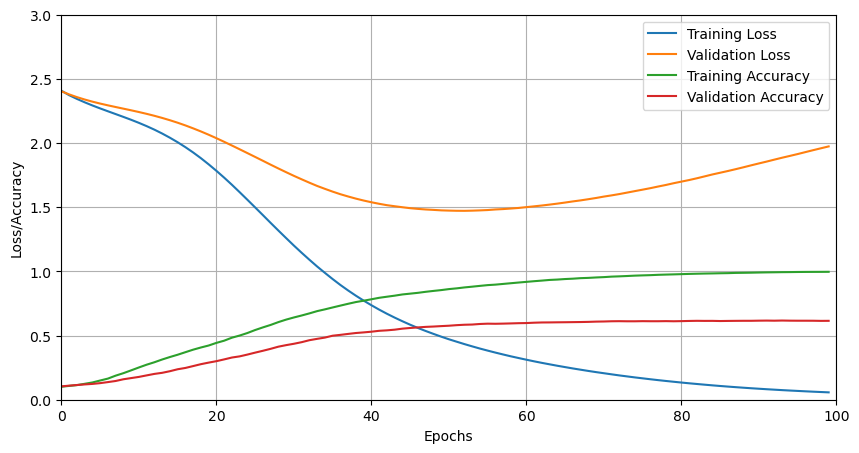

In [8]:
h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.axis([0,100,0,3])
plt.show()


Ao observarmos o grafico podemos concluir que:
O conjunto de treino apresenta uma acuracia de 0.99 e o conjunto de teste apresenta uma acuracia de 0.62, o que indica que o modelo esta com overfitting, ou seja, Ajustou-se demais ao consjunto de treino.

In [9]:
Y2p=mlp.predict(X2p)
y2p=np.argmax(Y2p,axis=1)
print(confusion_matrix(y2,y2p))
print('Score:',np.sum(y2==y2p)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2p))

157/157 [==============================] - 0s 1ms/step
[[307   9  18  11  28  32   4  30  42  19]
 [  4 304  31  10  25   5  35   8  49  29]
 [  5  41 279  21  35  12  34  17  33  23]
 [  6  19  31 325   8  19  26  13  45   8]
 [ 38  24  33  21 291  10  16  25   9  33]
 [  3  13  53  20  19 319  18   8  31  16]
 [  7  21  46  19  19   9 342  18  11   8]
 [ 22  23   7  17  39  12  41 274  20  45]
 [  8  28  39  23   6  22  17   3 340  14]
 [ 13  50  27   4  37  14  20  19  23 293]]
Score: 61.480000000000004
Number of erros: 1926


<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this new network. Make sure the test results are better than in the previous 2 questions.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
from keras.regularizers import l2

D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1*1.
X2=D.X2*1.
y1=D.y1
y2=D.y2

print("Original:", X1.shape,X2.shape,y1.shape,y2.shape)
X1=X1.reshape((10000,28**2))*1.
X2=X2.reshape((5000,28**2))*1.

Y1=keras.utils.to_categorical(y1)
Y2=keras.utils.to_categorical(y2)
print("P", X1.shape,X2.shape,Y1.shape,Y2.shape)

# Normalization with standarScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)
X2 = scaler.transform(X2)

print("StandarScaler:", X1.shape,X2.shape)

# Transforming the data with PCA
# from sklearn.decomposition import PCA
# nComponets = 250
# pca=PCA(n_components=nComponets, whiten=True).fit(X1)
# X1=pca.transform(X1)
# X2=pca.transform(X2)

Original: (10000, 28, 28) (5000, 28, 28) (10000,) (5000,)
P (10000, 784) (5000, 784) (10000, 10) (5000, 10)
StandarScaler: (10000, 784) (5000, 784)


Epoch 1/150
79/79 [==============================] - 3s 12ms/step - loss: 1.3620 - accuracy: 0.5457 - val_loss: 1.0111 - val_accuracy: 0.6746
Epoch 2/150
79/79 [==============================] - 1s 9ms/step - loss: 0.7607 - accuracy: 0.7589 - val_loss: 0.8701 - val_accuracy: 0.7180
Epoch 3/150
79/79 [==============================] - 1s 8ms/step - loss: 0.6308 - accuracy: 0.7962 - val_loss: 0.8076 - val_accuracy: 0.7420
Epoch 4/150
79/79 [==============================] - 1s 9ms/step - loss: 0.5447 - accuracy: 0.8242 - val_loss: 0.7437 - val_accuracy: 0.7594
Epoch 5/150
79/79 [==============================] - 1s 8ms/step - loss: 0.4959 - accuracy: 0.8414 - val_loss: 0.7224 - val_accuracy: 0.7688
Epoch 6/150
79/79 [==============================] - 1s 7ms/step - loss: 0.4526 - accuracy: 0.8554 - val_loss: 0.6906 - val_accuracy: 0.7842
Epoch 7/150
79/79 [==============================] - 1s 8ms/step - loss: 0.4211 - accuracy: 0.8623 - val_loss: 0.6621 - val_accuracy: 0.7830
Epoch 8/150


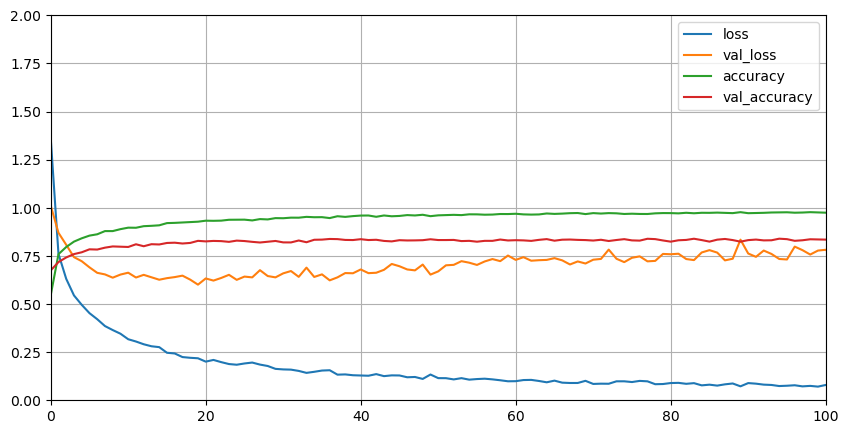

In [11]:
from sklearn.decomposition import PCA
# import kernel_regularizer=regularizers.l2(0.01)
from keras import regularizers
mlp=keras.Sequential()
mlp.add(keras.layers.Dense(200,activation='relu',input_shape=(X1.shape[1],)))
mlp.add(keras.layers.Dropout(.5)) # apply 30% dropout to the next layer
# mlp.add(keras.layers.BatchNormalization()) # apply batch normalization to the next layer
mlp.add(keras.layers.Dense(200,activation='relu')) #, kernel_regularizer=regularizers.l2(0.01))
mlp.add(keras.layers.Dropout(.3))
# mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(100,activation='relu'))
mlp.add(keras.layers.Dense(10,activation='softmax'))


mlp.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

train=mlp.fit(X1,Y1,epochs=150, batch_size=128, 
              validation_data=(X2,Y2), 
              verbose=1, shuffle=True)
            #   callbacks=[keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)])

h=train.history
plt.figure(figsize=(10,5))
plt.plot(h['loss'], label='loss')
plt.plot(h['val_loss'], label='val_loss')
plt.plot(h['accuracy'], label='accuracy')
plt.plot(h['val_accuracy'], label='val_accuracy')
plt.grid(True)
plt.axis([0,100,0,2])
plt.legend()

In [12]:
print("Treino:" )
Y1e=mlp.predict(X1)
y1e=np.argmax(Y1e,axis=1)
print(confusion_matrix(y1,y1e))
print('Score:',np.sum(y1==y1e)/y1.shape[0]*100)
print('Number of erros:', np.sum(y1!=y1e))

print("\n Teste:" )
Y2e=mlp.predict(X2)
y2e=np.argmax(Y2e,axis=1)
print(confusion_matrix(y2,y2e))
print('Score:',np.sum(y2==y2e)/y2.shape[0]*100)
print('Number of erros:', np.sum(y2!=y2e))

Treino:
313/313 [==============================] - 1s 3ms/step
[[1000    0    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0    0 1000    0    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0    0 1000    0    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0    0 1000    0]
 [   0    0    0    0    0    0    0    0    0 1000]]
Score: 100.0
Number of erros: 0

 Teste:
157/157 [==============================] - 0s 2ms/step
[[434   0   1   1  23  14   6  11  10   0]
 [  3 413   3   3  12   5  35   3  10  13]
 [  4  11 384  17   8  14  16  18  19   9]
 [  2   4   7 467   1   4   7   0   4   4]
 [ 17  22   8  10 401   7   7   8   7  13]
 [  2  16  21   6   5 413  13   1  14   9]
 [  3  10  15   1  16   1 445   4   5   0]
 [ 15   5